# CSE 252A Computer Vision I Fall 2019 - Homework 4
## Instructor: Ben Ochoa
### Assignment published on: Tuesday, November 05, 2019
### Due on: Tuesday, November 19, 2019 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
  * This assignment must be completed individually.
* All solutions must be written in this notebook.
  * This includes the theoretical problems, for which you **must** write your answers in Markdown cells (using LaTeX when appropriate).
  * Programming aspects of the assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you may do so. It has only been provided as a framework for your solution.
* You may use Python packages (such as NumPy and SciPy) for basic linear algebra, but you may not use packages that directly solve the problem.
  * If you are unsure about using a specific package or function, then ask the instructor and/or teaching assistants for clarification.
* You must submit this notebook exported as a PDF. You must also submit this notebook as `.ipynb` file.
  * Submit both files (`.pdf` and `.ipynb`) on Gradescope.
  * **You must mark the PDF pages associated with each question in Gradescope. If you fail to do so, we may dock points.**
* It is highly recommended that you begin working on this assignment early.
* **Late policy: assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.**

## Problem 1: Epipolar Geometry [4 pts]
Consider two cameras whose image planes are the z=1 plane, and whose focal points are at (-12, 0, 0) and (12, 0, 0). We''ll call a point in the first camera (x, y), and a point in the second camera (u, v). Points in each camera are relative to the camera center. So, for example if (x, y) = (0, 0), this is really the point (-12, 0, 1) in world coordinates, while if (u, v) = (0, 0) this is the point (12, 0, 1).
![fig1](fig/fig1.png)

a) Suppose the points (x, y) = (8, 7) is matched to the point (u, v) = (2, 7). What is the 3D location of this point?

b) Compute the Essential Matrix.

c) Consider points that lie on the line x + z = 2, y = 0. Use the same stereo set up as before. Write an analytic expression giving the disparity of a point on this line after it projects onto the two images, as a function of its position in the right image. So your expression should only involve the variables u and d (for disparity). Your expression only needs to be valid for points on the line that are in front of the cameras, i.e. with z > 1.

## Problem 2: Epipolar Rectification [4 pts]
In stereo vision, image rectification is a common preprocessing step to simplify the problem of finding
matching points between images. The goal is to warp image views such that the epipolar lines are
horizontal scan lines of the input images. Suppose that we have captured two images $I_A$ and $I_B$ from
identical calibrated cameras separated by a rigid transformation

$_{A}^{B}\textrm{T}= \begin{bmatrix}
\boldsymbol{R} & \boldsymbol{t} \\ 
0^T & 1
\end{bmatrix}$ and $\boldsymbol{t}=[t_x,t_y,t_z]$

Without loss of generality assume that camera A's optical center is positioned at the origin and that its optical axis is in the direction of the z-axis.

From the lecture, a rectifying transform for each image should map the epipole to a point infinitely far away in the horizontal direction $ H_{A}e_{A} = H_{B}e_{B} = [1, 0, 0]^T$. Consider the following special cases:

a) Pure horizontal translation $\boldsymbol{t} = [t_{x}, 0, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

b) Pure translation orthogonal to the optical axis $\boldsymbol{t} = [t_{x}, t_{y}, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

c) Pure translation along the optical axis $\boldsymbol{t} = [0, 0, t_{z}]^T$, $\boldsymbol{R} = \boldsymbol{I}$

d) Pure rotation $\boldsymbol{t} = [0, 0, 0]^T$, $\boldsymbol{R}$ is an arbitrary rotation matrix

For each of these cases, determine whether or not epipolar rectification is possible. Include the following information for each case:

(i) The epipoles $e_A$ and $e_B$

(ii) The equation of the epipolar line $l_B$ in $I_B$ corresponding to the point $[x_A, y_A, 1]^T$ in $I_A$ (if one exists)

(iii) A plausible solution to the rectifying transforms $H_A$ and $H_B$ (if one exists) that attempts to minimize distortion (is as close as possible to a 2D rigid transformation). Note that the above 4 cases are special cases; a simple solution should become apparent by looking at the epipolar lines.

One or more of the above rigid transformations may be a degenerate case where rectification is not
possible or epipolar geometry does not apply. If so, explain why.

## Problem 3: Sparse Stereo Matching [32 pts]

In this problem we will play around with sparse stereo matching methods. You will work on two image pairs, a warrior figure and a figure from the Matrix movies. These files both contain two images, two camera matrices, and two sets of corresponding points (extracted by manually clicking the images). For illustration, I have run my code on a third image pair (dino1.png, dino2.png). This data is also provided for you to debug your code, but **you should only report results on warrior and matrix**. In other words, where I include one (or a pair) of images in the assignment below, you will provide the same thing but for BOTH matrix and warrior. Note that the matrix image pair is harder, in the sense that the matching algorithms we are implementing will not work quite as well. You should expect good results, however, on warrior.

### Corner Detection [8 pts]
The first thing we need to do is to build a corner detector. This should be done according to http://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec7.pdf. You should fill in the function <code>corner_detect</code> below, and take as input <code>corner_detect(image, nCorners, smoothSTD, windowSize)</code> where smoothSTD is the standard deviation of the smoothing kernel and windowSize is the window size for corner detector and non maximum suppression. In the lecture the corner detector was implemented using a hard threshold. Do not do that but instead return the nCorners strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned. Run your code on all four images (with nCorners = 20) and show outputs as shown below. You may find scipy.ndimage.filters.gaussian_filter easy to use for smoothing. In this problem, try the following different standard deviation ($\sigma$) parameters for the Gausian smoothing kernel: 0.5, 1, 2 and 4. For a particular $\sigma$, you should take the kernel size to be $6\times\sigma$ (add $1$ if the kernel size is even). So for example if $\sigma=2$, corner detection kernel size should be $13$. This should be followed throughtout all experiments in this assignment.

There will be a total of 16 images as outputs : (4 choices of smoothSTD x 2 matrix imgs x 2 warrior imgs). 


![dinoCorner1](fig/dinoCorner1.png)
![dinoCorner2](fig/dinoCorner2.png)

Comment on your results and observations (3/8 points). You don't need to comment per output, just **discuss** any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pair of images warrior and matrix. Also discuss if you are able to find corresponding corners for same pair of images. 

In [1]:
import numpy as np
# from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import imageio
from PIL import Image

In [2]:
def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [3]:
import math
def corner_detect(image, nCorners, smoothSTD, windowSize):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for corner detector and non maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).

    """
    
    """
    Put your awesome numpy powered code here:
    """
    image = gaussian_filter(image, smoothSTD)
    image_dx, image_dy = np.gradient(image)

    Clamb = np.zeros((image.shape[0], image.shape[1]))
    for i in range(0, image.shape[0] - windowSize):
        for j in range(0, image.shape[1] - windowSize):
            Ix = image_dx[i : i+windowSize + 1, j : j+windowSize + 1]
            Iy = image_dy[i : i+windowSize + 1, j : j+windowSize + 1]
            Ix2 = np.sum(Ix * Ix)
            Iy2 = np.sum(Iy * Iy)
            Ixy = np.sum(Ix * Iy)
            Cxy = np.array([[Ix2, Ixy], [Ixy, Iy2]])
            tr = Ix2 + Iy2
            det = Ix2 * Iy2 - Ixy*Ixy
            root = tr * tr - 4 * det    
            if root < 0:
                Clamb[i][j] = tr / 2
            else:
                Clamb[i][j] = (tr - math.sqrt(root)) /2

    Csupress = []
    for i in range(0, image.shape[0] - windowSize, windowSize):
        for j in range(0, image.shape[1] - windowSize, windowSize):
            patch = Clamb[i: i+windowSize+1, j : j+windowSize+1]
            max_lamb = max(patch.flatten())
            for k in range(0, windowSize):
                for l in range(0, windowSize):
                    if patch[k][l] ==max_lamb:
                        Csupress.append((max_lamb, (j + l, i + k)))
                    continue
                    
    Csupress.sort()
    Csupress.reverse()
    corners = np.zeros((nCorners, 2), dtype = 'int32')
    for i in range(0, corners.shape[0]):
        corners[i, :] = Csupress[i][1]
    return corners


In [4]:
def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=36, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=36, edgecolors='r', facecolors='none')
    plt.show()

SmoothSTD: 0.5 WindowSize: 3


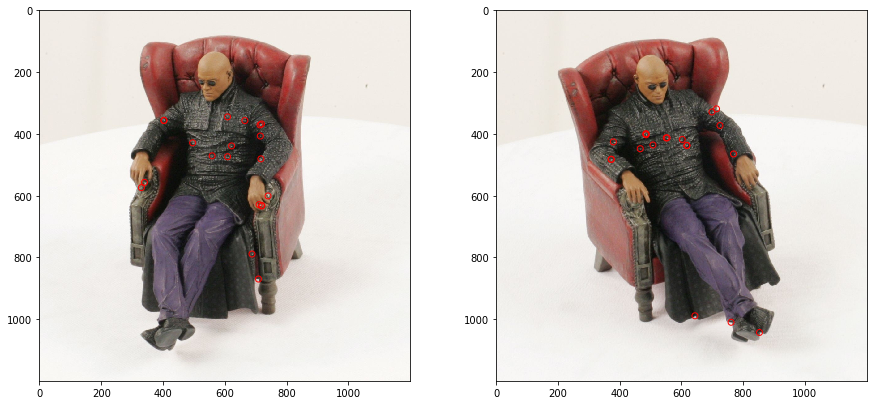

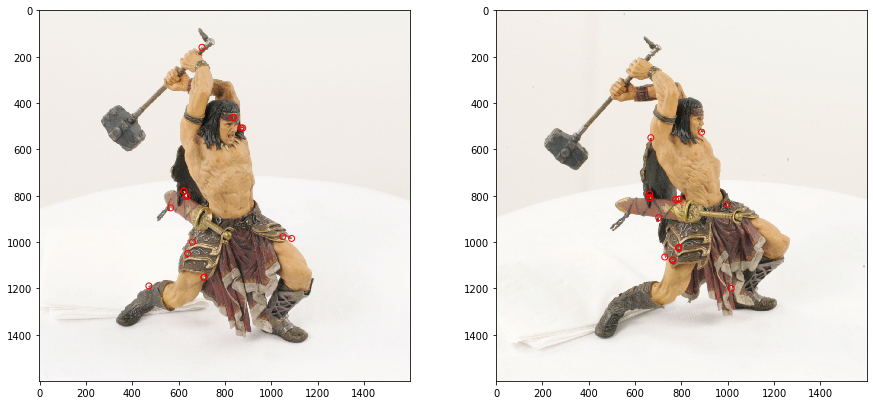

SmoothSTD: 1 WindowSize: 7


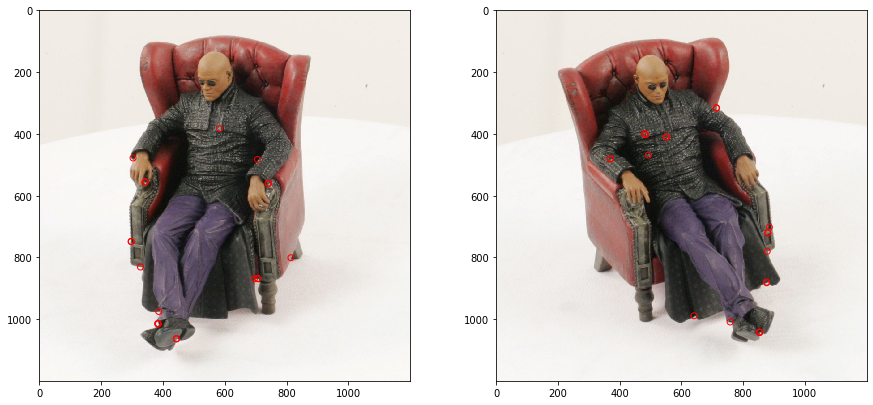

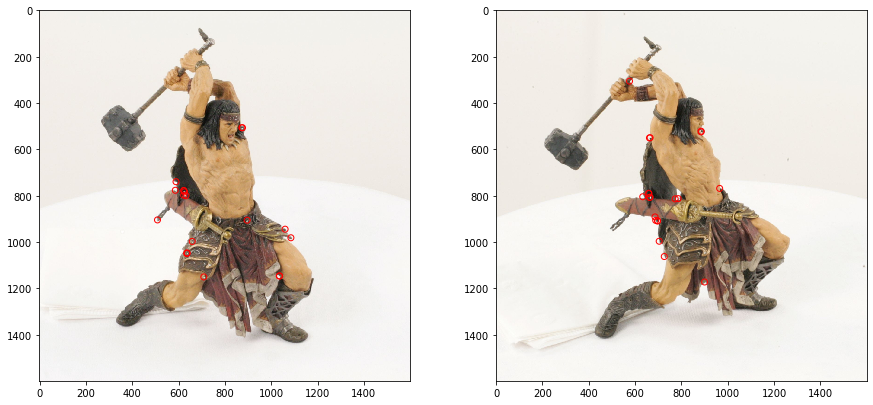

SmoothSTD: 2 WindowSize: 13


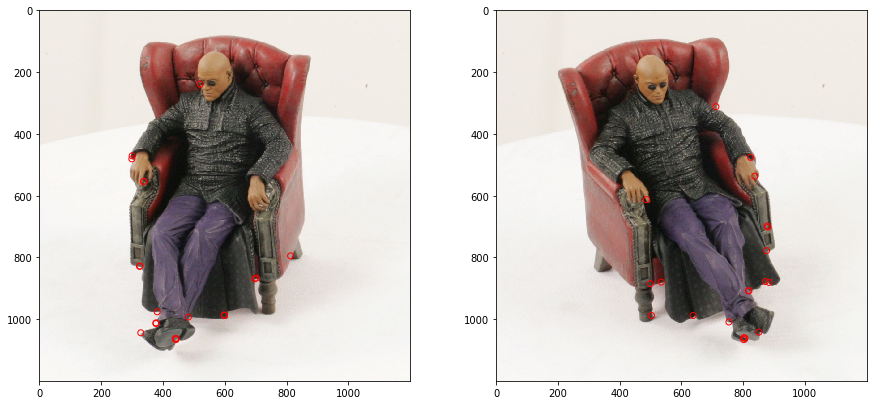

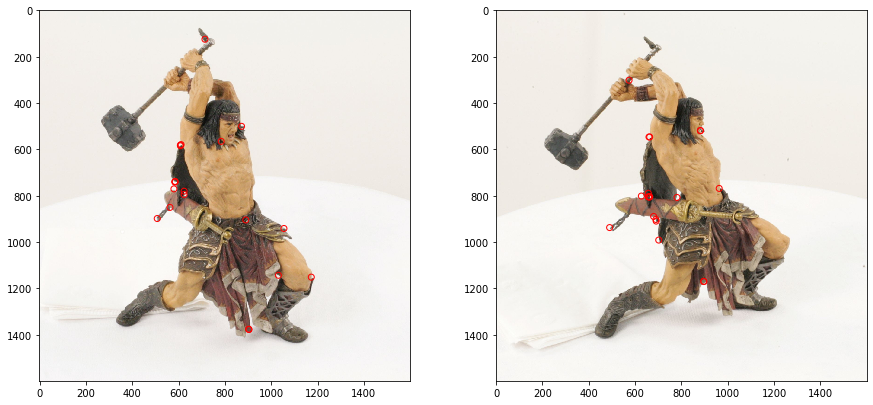

SmoothSTD: 4 WindowSize: 25


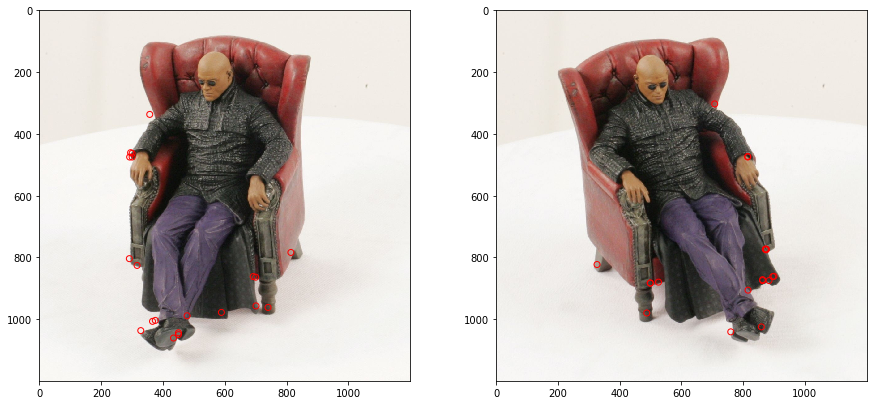

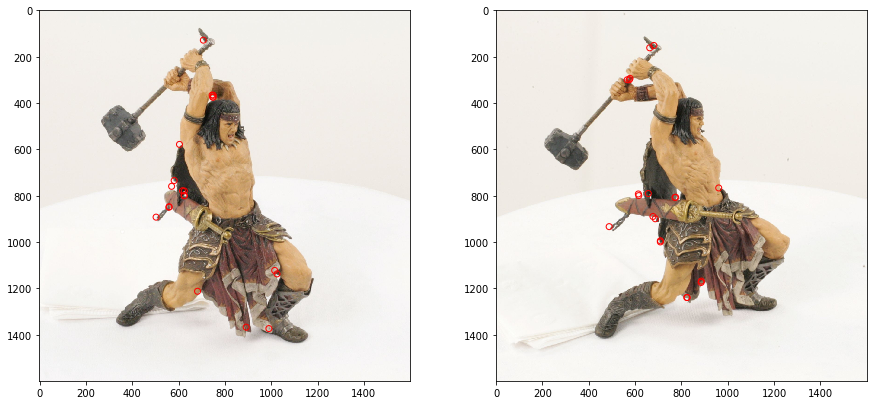

In [5]:
# detect corners on warrior and matrix image sets
# adjust your corner detection parameters here
nCorners = 20
smoothSTDs = [0.5, 1, 2, 4]
imgs_mat = []
imgs_war = []
grayimgs_mat = []
grayimgs_war = []
# Read the two images and convert it to Greyscale
for i in range(2):
    img_mat = imageio.imread('p4/matrix/matrix' + str(i) + '.png')
    imgs_mat.append(img_mat) 
    grayimgs_mat.append(rgb2gray(img_mat))

    img_war = imageio.imread('p4/warrior/warrior' + str(i) + '.png')
    imgs_war.append(img_war)
    grayimgs_war.append(rgb2gray(img_war))
    
    
    
for smoothSTD in smoothSTDs:
    windowSize = int(6*smoothSTD)
    if windowSize%2==0: windowSize += 1
    crns_mat = []
    crns_war = []
    print ("SmoothSTD:", smoothSTD, "WindowSize:", windowSize)
    for i in range(2):
        crns_mat.append(corner_detect(grayimgs_mat[i], nCorners, smoothSTD,\
                                      windowSize))
        crns_war.append(corner_detect(grayimgs_war[i], nCorners, smoothSTD,\
                                      windowSize))
    show_corners_result(imgs_mat, crns_mat) #uncomment this to show your output!
    show_corners_result(imgs_war, crns_war)

### NCC (Normalized Cross-Correlation) Matching [2 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.
NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$ where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [59]:
def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    
    """
    Your code here:
    """
    def Wtilde(W):
        mean = np.mean(W)
        W = W - mean
        W = W / math.sqrt(np.sum(W*W))
        return W
    
    W1 = img1[c1[1]-R: c1[1]+R+1, c1[0]-R: c1[0]+R+1]
    W2 = img2[c2[1]-R: c2[1]+R+1, c2[0]-R: c2[0]+R+1]
    W1 = Wtilde(W1)
    W2 = Wtilde(W2)
#     if W1.shape != W2.shape:
#         W0 = np.zeros((21,21,3))
#         for i in range(W2.shape[0]):
#             for j in range(W2.shape[1]):
#                 W0[i][j] = W2[i][j]
#         for i in range(W2.shape[1]):
#             W0[-1][i]=W2[-1][i]
#         W2 = W0
#         print(W2.shape)
    
    matching_score = np.sum(W1 * W2)
    return matching_score

In [7]:
# test NCC match
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])
print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.8546
print (ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.8457
print (ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.6258

0.8546547739343037
0.8457615282174419
0.6258689611426174


### Naive Matching [4 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondances. One naive strategy is to try and find the best match between the two sets of corner points. Write a script that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (NCCth) value by experimentation. Write a function <code>naive_matching</code> and call it as below. Examine your results for 10, 20, and 30 detected corners in each image. Choose number of detected corners to maximize the number of correct matching pairs. <code>naive_matching</code> will call your NCC matching code. 
**Properly label or mention which output corresponds to which choice of number of corners. Total number of output is 6 images** (3 choice of number of corners for each matrix and warrior), where one image is like below:


Number of Corners: 10
<img src = "fig/dinoMatch.png" alt="dino match" width="800"/>

In [84]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        NCC matching result a list of tuple (c1, c2), 
        c1 is the 1x2 corner location in image 1, 
        c2 is the 1x2 corner location in image 2. 

    """
    
    """
    Your code here:
    """
    matching = []
    for i in range(corners1.shape[0]):
        corn1 = corners1[i]
        score_max = -1000
        for j in range(corners2.shape[0]):
            corn2 = corners2[i]
            score = ncc_match(img1, img2, corn1, corn2, R)
            if score > score_max:
                score_max = score
                match = (corn1, corn2)              
        if score_max >= NCCth:
            matching.append(match_pair)         
    return matching

In [ ]:
# You are free to modify code here, create your helper functions etc.
# detect corners on warrior and matrix sets
nCorners = 10 # Do this for 10, 20 and 30 corners
smoothSTD = 2
windowSize = 13

# read images and detect corners on images
imgs_mat = []
crns_mat = []
imgs_war = []
crns_war = []
for i in range(2):
    img_mat = imageio.imread('p4/matrix/matrix' + str(i) + '.png')
#     imgs_mat.append(rgb2gray(img_mat))
    # downsize your image in case corner_detect runs slow in test
    imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
    crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))
    
    img_war = imageio.imread('p4/warrior/warrior' + str(i) + '.png')
#     imgs_war.append(rgb2gray(img_war))
    imgs_war.append(rgb2gray(img_war)[::2, ::2])
    crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))

In [ ]:
# match corners
R = 15
NCCth = 0.4 # Put your threshold
matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, crns_mat[0], crns_mat[1], R, NCCth)
matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, crns_war[0], crns_war[1], R, NCCth)

In [ ]:
# plot matching result
def show_matching_result(img1, img2, matching):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') # two dino images are of different sizes, resize one before use
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.savefig('dino_matching.png')
    plt.show()

# Uncomment to show output
print("Number of Corners:", nCorners)
show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
show_matching_result(imgs_war[0], imgs_war[1], matching_war)

### Epipolar Geometry [4 pts]

Complete the <code>compute_fundamental</code> function below using 8 point algorithm described in [Lecture 8](http://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec8.pdf). Using the <code>fundamental_matrix</code> function and the corresponding points provided in cor1.npy and cor2.npy, calculate the fundamental matrix for the set of matrix and warrior image. Note that the normalization of the corner point is handled in the <code>fundamental_matrix</code> function.

In [12]:
import numpy as np
# from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.io import loadmat

def compute_fundamental(x1,x2):
    """    Computes the fundamental matrix from corresponding points 
        (x1,x2 3*n arrays) using the 8 point algorithm.
        Each row in the A matrix below is constructed as
        [x'*x, x'*y, x', y'*x, y'*y, y', x, y, 1] 

        Returns:
        Fundamental Matrix (3x3)

    """

    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")
    # return your F matrix
    A = np.zeros((n, 9))
    for i in range(n):
        A[i] = [x1[0,i]*x2[0,i], x1[0,i]*x2[1,i], x1[0, i]*x2[2, i], x1[1,i]*x2[0,i], x1[1,i] *x2[1,i],x1[1,i]*x2[2,i], x1[2,i]*x2[0,i], x1[2,i]*x2[1, i], x1[2,i]*x2[2,i]]
    U, S, V = np.linalg.svd(A)
    F = V[-1].reshape(3, 3)
    U, S, V = np.linalg.svd(F)
    F = np.dot(U, np.dot(np.diag(S), V))
    return F/F[2, 2]

def fundamental_matrix(x1,x2):
    # Normalization of the corner points is handled here
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)

    # reverse normalization
    F = np.dot(T1.T,np.dot(F,T2))

    return F/F[2,2]

### Plot Epipolar Lines [5 pts]
Using this fundamental matrix, plot the epipolar lines in both image pairs across all images. For this part you may want to complete the function <code>plot_epipolar_lines</code>. Shown your result for matrix and warrior as the figure below. 
![Dino Epipolar](fig/dinoEpi1.png)
![Dino Epipolar](fig/dinoEpi2.png)

Also, write the script to calculate the epipoles for a given Fundamental matrix and corner point correspondences in the two images.

In [76]:
def compute_epipole(F):
    '''
    This function computes the epipoles for a given fundamental matrix 
    and corner point correspondences
    input:
    F--> Fundamental matrix
    output:
    e1--> corresponding epipole in image 1
    e2--> epipole in image2
    '''
    #your code here
    e1 = np.linalg.svd(F.T)[-1]
    e1 = e1[-1, :] /e1[-1, :][-1]
    e2 = np.linalg.svd(F)[-1]
    e2 = e2[-1, :]/e2[-1, :][-1]
    return e1,e2

def plot_epipolar_lines(img1,img2, cor1, cor2):
    """Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        cor1: Corners in homogeneous image coordinate in image 1 (3xn)
        cor2: Corners in homogeneous image coordinate in image 2 (3xn)

    """
    
    """
    Your code here:
    """
    

    F = fundamental_matrix(cor1, cor2)
    fig1 = plt.figure(figsize = (8, 8))
    plt.imshow(img1, cmap = 'gray')
    for i in range(cor1.shape[1]):
        plt.scatter(cor1[0][i], cor1[1][i], s=35, edgecolors='b', facecolors='b')
    for i in range(cor2.shape[1]):
        a1 = np.dot(F, cor1[:, i])
        x1, x2 = 0, img1.shape[1]
        y1 = a1[2]/(-a1[1])
        y2 = (x2*a1[0] + a1[2])/(-a1[1])
        plt.plot([x1, x2], [y1, y2], color = 'b')
        plt.axis([0, img1.shape[1], img1.shape[0], 0])    
    plt.show()
    
    fig2 = plt.figure(figsize = (8, 8))
    plt.imshow(img2, cmap = 'gray')
    for i in range(cor2.shape[1]):
        plt.scatter(cor2[0][i], cor2[1][i], s=35, edgecolors='b', facecolors='b')
    for i in range(cor1.shape[1]):
        a2 = np.dot(F, cor1[:, i])
        x1, x2 = 0, img2.shape[1]
        y1 = a2[2]/(-a2[1])
        y2 = (x2*a2[0] + a2[2])/(-a2[1])
        plt.plot([x1, x2], [y1, y2], color = 'b')
        plt.axis([0, img2.shape[1], img2.shape[0], 0])    
    plt.show()

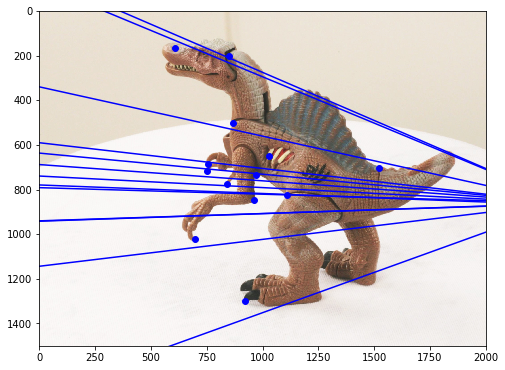

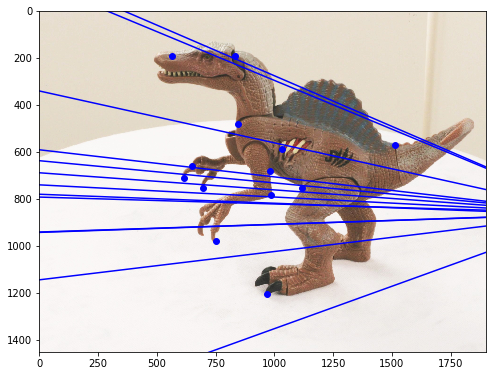

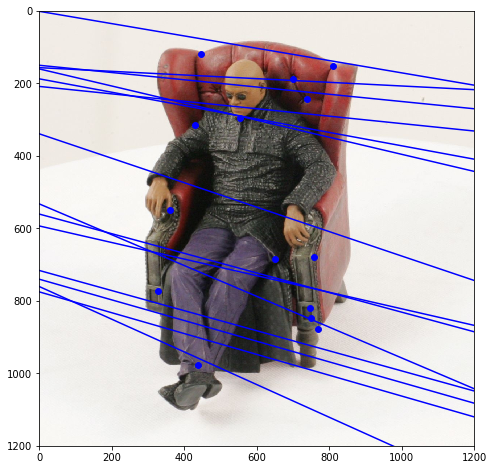

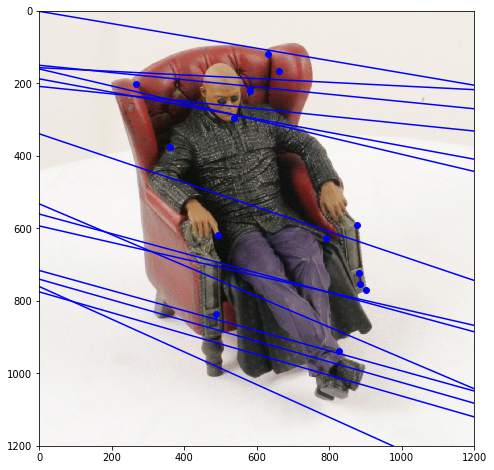

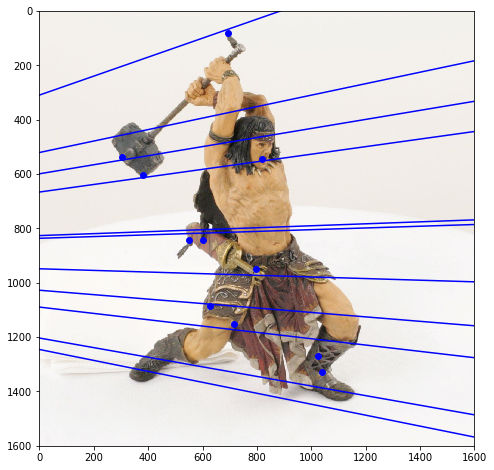

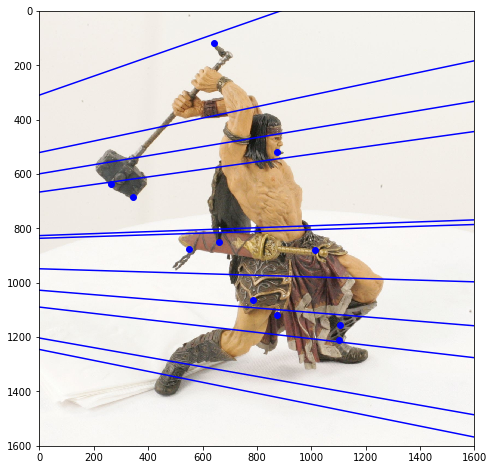

In [14]:
# replace images and corners with those of matrix and warrior
imgids = ["dino", "matrix", "warrior"]
for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")

    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")
    plot_epipolar_lines(I1,I2,cor1,cor2)

### Image Rectification [5 pts]
 An interesting case for epipolar geometry occurs when two images are parallel to each other. In this case, there is no rotation component involved between the two images and the essential matrix is $\texttt{E}=[\boldsymbol{T_{x}}]\boldsymbol{R}=[\boldsymbol{T_{x}}]$. Also if you observe the epipolar lines $\boldsymbol{l}$ and $\boldsymbol{l^{'}}$ for parallel images, they are horizontal and consequently, the corresponding epipolar lines share the same vertical coordinate. Therefore the process of making images parallel becomes useful while discerning the relationships between corresponding points in images.
 Rectifying a pair of images can also be done for uncalibrated camera images (i.e. we do not require the camera matrix of intrinsic parameters). Using the fundamental matrix we can find the pair of epipolar lines $\boldsymbol{l_i}$ and $\boldsymbol{l^{'}_i}$ for each of the correspondences. The intersection of these lines will give us the respective epipoles $\boldsymbol{e}$ and $\boldsymbol{e^{'}}$.  Now to make the epipolar lines to be parallel we need to map the epipoles to infinity. Hence , we need to find a homography that maps the epipoles to infinity. The method to find the homography has been implemented for you. You can read more about the method used to estimate the homography in the paper "Theory and Practice of Projective Rectification" by Richard Hartley.
 ![Image Rectification Setup](image_rectification.png)
 Using the compute_epipoles function from the previous part and the given compute_matching_homographies function, find the rectified images and plot the parallel epipolar lines using the plot_epipolar_lines function from above. You need to do this for both the matrix and the warrior images. A sample output will look as below:
 ![sample rectification](Sample_rectification.png)

In [77]:
def compute_matching_homographies(e2, F, im2, points1, points2):
    
    '''This function computes the homographies to get the rectified images
    input:
    e2--> epipole in image 2
    F--> the Fundamental matrix (Think about what you should be passing F or F.T!)
    im2--> image2
    points1 --> corner points in image1
    points2--> corresponding corner points in image2
    output:
    H1--> Homography for image 1
    H2--> Homography for image 2
    '''
    # calculate H2
    width = im2.shape[1]
    height = im2.shape[0]

    T = np.identity(3)
    T[0][2] = -1.0 * width / 2
    T[1][2] = -1.0 * height / 2

    e = T.dot(e2)
    e1_prime = e[0]
    e2_prime = e[1]
    if e1_prime >= 0:
        alpha = 1.0
    else:
        alpha = -1.0

    R = np.identity(3)
    R[0][0] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[0][1] = alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][0] = - alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][1] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)

    f = R.dot(e)[0]
    G = np.identity(3)
    G[2][0] = - 1.0 / f

    H2 = np.linalg.inv(T).dot(G.dot(R.dot(T)))

    # calculate H1
    e_prime = np.zeros((3, 3))
    e_prime[0][1] = -e2[2]
    e_prime[0][2] = e2[1]
    e_prime[1][0] = e2[2]
    e_prime[1][2] = -e2[0]
    e_prime[2][0] = -e2[1]
    e_prime[2][1] = e2[0]

    v = np.array([1, 1, 1])
    M = e_prime.dot(F) + np.outer(e2, v)

    points1_hat = H2.dot(M.dot(points1.T)).T
    points2_hat = H2.dot(points2.T).T

    W = points1_hat / points1_hat[:, 2].reshape(-1, 1)
    b = (points2_hat / points2_hat[:, 2].reshape(-1, 1))[:, 0]

    # least square problem
    a1, a2, a3 = np.linalg.lstsq(W, b)[0]
    HA = np.identity(3)
    HA[0] = np.array([a1, a2, a3])

    H1 = HA.dot(H2).dot(M)
    return H1, H2


def to_homog(points):
    return np.vstack((points, np.ones(np.size(points, 1))))

def from_homog(points_homog):
    m = np.divide(points_homog, points_homog[-1])
    return np.delete(m, (-1), axis = 0)

def rectify_img(H, img):
    target_image = np.ones(img.shape)

    for x in range(0, img.shape[1]):
        for y in range(0, img.shape[0]):
            # convert to homogeneous coordinate
            xy_homo = to_homog(np.array([[x, y]]).T)
            # apply homography
            mapped_x, mapped_y = from_homog(np .dot(H, xy_homo)).T[0]
            if 0<=int(mapped_y)<img.shape[0] and \
             0<=int(mapped_x)<img.shape[1]:
                target_image[y, x, :] = img[int(mapped_y), int(mapped_x), :]
    return target_image

def rectify_points(H, points):
    for i in range(points.shape[1]):
        points[:, i] = np.dot(H, points[:, i])
        points[:, i] = points[:, i]/points[:, i][-1]
    return points
            
def image_rectification(im1,im2,points1,points2):
    '''this function provides the rectified images along with the new 
    corner points as outputs for a given pair of images with corner correspondences
    input:
    im1--> image1
    im2--> image2
    points1--> corner points in image1
    points2--> corner points in image2
    outpu:
    rectified_im1-->rectified image 1
    rectified_im2-->rectified image 2
    new_cor1--> new corners in the rectified image 1
    new_cor2--> new corners in the rectified image 2
    '''

    F = fundamental_matrix(points1, points2)
    e1, e2 = compute_epipole(F)
    H1, H2 = compute_matching_homographies(e2, F.T, im2, points1.T, points2.T)
    rectified_im1 = rectify_img(np.linalg.inv(H1), im1/np.max(im1))
    rectified_im2 = rectify_img(np.linalg.inv(H2), im2/np.max(im2))
    new_cor1 = rectify_points(H1, points1)
    new_cor2 = rectify_points(H2, points2)
    
    return rectified_im1, rectified_im2, new_cor1, new_cor2

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


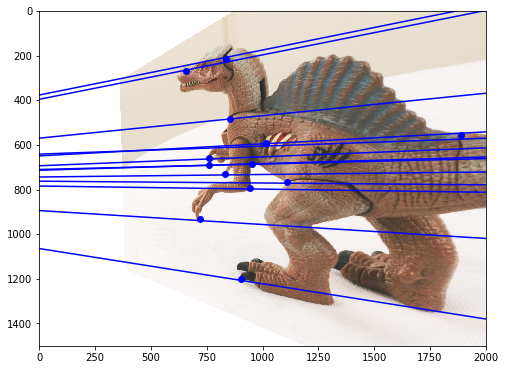

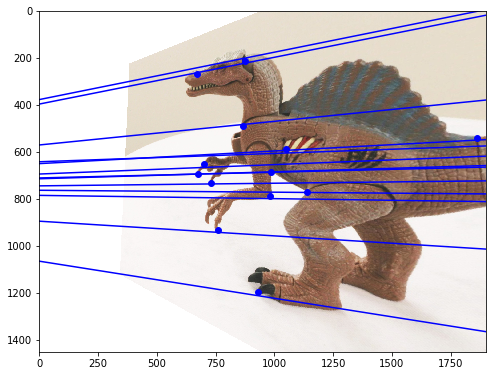

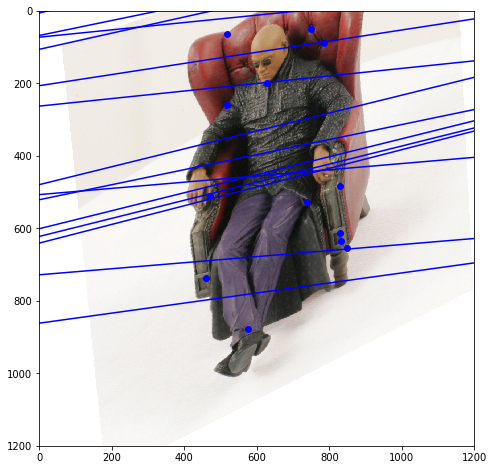

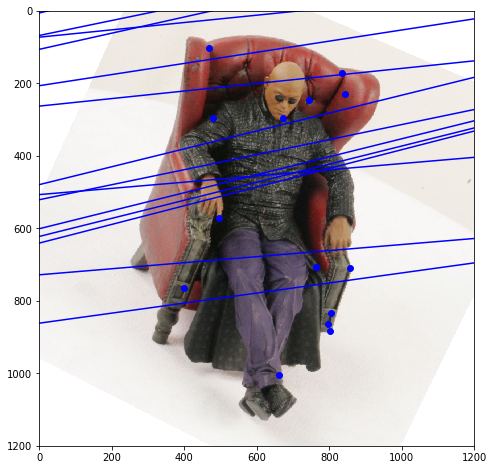

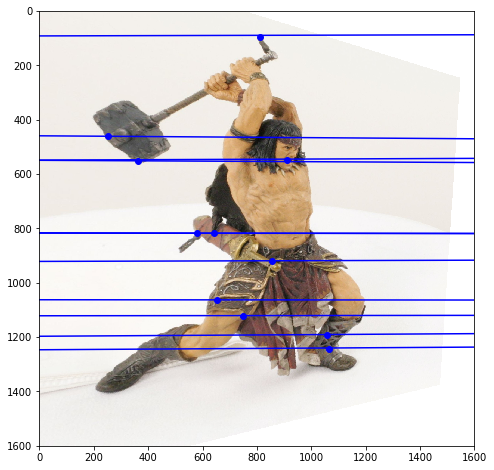

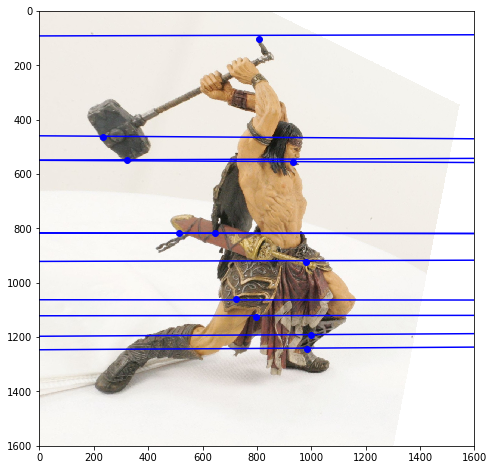

In [78]:
# replace images and corners with those of matrix and warrior
imgids = ["dino", "matrix", "warrior"]
for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")

    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")
    I1, I2, cor1, cor2 = image_rectification(I1, I2, cor1, cor2)
    plot_epipolar_lines(I1,I2,cor1,cor2)

### Matching Using epipolar geometry[4 pts]

We will now use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm. First, detect 10 corners
in Image1. Then, for each corner, do a linesearch along the corresponding parallel epipolar line in Image2.
Evaluate the NCC score for each point along this line and return the best match (or no match if all
scores are below the NCCth). R is the radius (size) of the NCC patch in the code below.  You do not
have to run this in both directions. Show your result as in the naive matching part. Execute this for the warrior and matrix images (**Total two outputs images**).

In [27]:
def display_correspondence(img1, img2, corrs, name):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence

    """
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray')
    for p1, p2 in corrs:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(
            p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.savefig(name + '_matching.png')
    plt.show()


def correspondence_matching_epipole(img1, img2, corners1, F, R, NCCth):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Detected corners in image 1.
        F: Fundamental matrix calculated using given 
        ground truth corner correspondences.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    
    Returns:
        Matching result to be used in display_correspondence function

    """
    matching = []
    corners1 = to_homog(corners1.T)
    for i in range(0, corners1.shape[1]):
        a = np.dot(F.T, corners1[:, i])
        score_max = None
        match_pair = None
        # we will use line equation Ax+By+C = 0
        for x in range(R, img2.shape[1]-R):
            y = int((a[0]*x + a[2])/(-a[1]))
#             skiped for outside window size
            if y < R or y > img2.shape[0]-R:
                continue
            corn1 = corners1[:2, i].astype(np.int32)
            corn2 = np.array([x, y]).astype(np.int32)
            # calculate ncc match similarity
            score = ncc_match(img1, img2, corn1, corn2, R)
            if (score_max is None) or (score > score_max):
                score_max = score 
                match_pair = (corn1, corn2)
                
        if score_max > NCCth:
            matching.append(match_pair)

    return matching

In [19]:
I1 = imageio.imread("./p4/matrix/matrix0.png")
I2 = imageio.imread("./p4/matrix/matrix1.png")
cor1 = np.load("./p4/matrix/cor1.npy")
cor2 = np.load("./p4/matrix/cor2.npy")
I3 = imageio.imread("./p4/warrior/warrior0.png")
I4 = imageio.imread("./p4/warrior/warrior1.png")
cor3 = np.load("./p4/warrior/cor1.npy")
cor4 = np.load("./p4/warrior/cor2.npy")


In [20]:

# For matrix
rectified_im1,rectified_im2,new_cor1,new_cor2 = image_rectification(I1,I2,cor1,cor2)
F_new = fundamental_matrix(new_cor1, new_cor2)



/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


(1200, 1200, 3)


In [22]:
I1=imageio.imread("./p4/matrix/matrix0.png")
I2=imageio.imread("./p4/matrix/matrix1.png")
cor1 = np.load("./p4/matrix/cor1.npy")
cor2 = np.load("./p4/matrix/cor2.npy")

rectified_im1,rectified_im2,new_cor1,new_cor2 = image_rectification(I1,I2,cor1,cor2)
F_new = fundamental_matrix(new_cor1, new_cor2)

nCorners = 10
#decide the NCC matching window radius
R = 10
NCCth = 0.6
# detect corners using corner detector here, store in corners1
corners1 = corner_detect(rgb2gray(rectified_im1), nCorners, smoothSTD, windowSize)


/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)
(21, 21, 3)


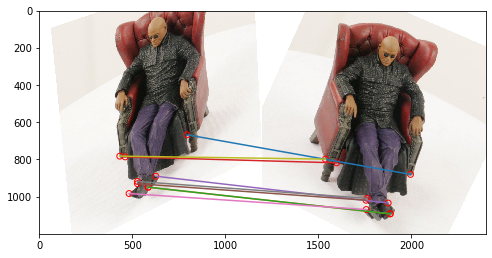

In [60]:
corrs = correspondence_matching_epipole(
    rectified_im1, rectified_im2, corners1, F_new, R, NCCth)
display_correspondence(rectified_im1, rectified_im2, corrs, name="matrix")

In [24]:

# For warrior
rectified_im3,rectified_im4,new_cor3,new_cor4 = image_rectification(I3,I4,cor3,cor4)
F_new2=fundamental_matrix(new_cor3, new_cor4)


/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [25]:
# You may wish to change your NCCth and R for warrior here.
corners2 = corner_detect(rgb2gray(rectified_im3), nCorners, smoothSTD, windowSize)


[673 759] [ 10 755]
[673 759] [ 11 755]
[673 759] [ 12 755]
[673 759] [ 13 755]
[673 759] [ 14 755]
[673 759] [ 15 755]
[673 759] [ 16 755]
[673 759] [ 17 755]
[673 759] [ 18 755]
[673 759] [ 19 755]
[673 759] [ 20 755]
[673 759] [ 21 755]
[673 759] [ 22 755]
[673 759] [ 23 755]
[673 759] [ 24 755]
[673 759] [ 25 755]
[673 759] [ 26 755]
[673 759] [ 27 755]
[673 759] [ 28 755]
[673 759] [ 29 755]
[673 759] [ 30 755]
[673 759] [ 31 755]
[673 759] [ 32 755]
[673 759] [ 33 755]
[673 759] [ 34 755]
[673 759] [ 35 755]
[673 759] [ 36 755]
[673 759] [ 37 755]
[673 759] [ 38 755]
[673 759] [ 39 755]
[673 759] [ 40 755]
[673 759] [ 41 755]
[673 759] [ 42 755]
[673 759] [ 43 755]
[673 759] [ 44 755]
[673 759] [ 45 755]
[673 759] [ 46 755]
[673 759] [ 47 755]
[673 759] [ 48 755]
[673 759] [ 49 755]
[673 759] [ 50 755]
[673 759] [ 51 755]
[673 759] [ 52 755]
[673 759] [ 53 755]
[673 759] [ 54 755]
[673 759] [ 55 755]
[673 759] [ 56 755]
[673 759] [ 57 755]
[673 759] [ 58 755]
[673 759] [ 59 755]


[673 759] [506 758]
[673 759] [507 758]
[673 759] [508 758]
[673 759] [509 758]
[673 759] [510 758]
[673 759] [511 758]
[673 759] [512 758]
[673 759] [513 758]
[673 759] [514 758]
[673 759] [515 758]
[673 759] [516 758]
[673 759] [517 758]
[673 759] [518 758]
[673 759] [519 758]
[673 759] [520 758]
[673 759] [521 758]
[673 759] [522 758]
[673 759] [523 758]
[673 759] [524 758]
[673 759] [525 758]
[673 759] [526 758]
[673 759] [527 758]
[673 759] [528 758]
[673 759] [529 758]
[673 759] [530 758]
[673 759] [531 758]
[673 759] [532 758]
[673 759] [533 758]
[673 759] [534 758]
[673 759] [535 758]
[673 759] [536 758]
[673 759] [537 758]
[673 759] [538 758]
[673 759] [539 758]
[673 759] [540 758]
[673 759] [541 758]
[673 759] [542 758]
[673 759] [543 758]
[673 759] [544 758]
[673 759] [545 758]
[673 759] [546 758]
[673 759] [547 758]
[673 759] [548 758]
[673 759] [549 758]
[673 759] [550 758]
[673 759] [551 758]
[673 759] [552 758]
[673 759] [553 758]
[673 759] [554 758]
[673 759] [555 758]


[673 759] [1006  761]
[673 759] [1007  761]
[673 759] [1008  761]
[673 759] [1009  761]
[673 759] [1010  761]
[673 759] [1011  761]
[673 759] [1012  761]
[673 759] [1013  761]
[673 759] [1014  761]
[673 759] [1015  761]
[673 759] [1016  761]
[673 759] [1017  761]
[673 759] [1018  761]
[673 759] [1019  761]
[673 759] [1020  761]
[673 759] [1021  761]
[673 759] [1022  761]
[673 759] [1023  761]
[673 759] [1024  761]
[673 759] [1025  761]
[673 759] [1026  761]
[673 759] [1027  761]
[673 759] [1028  761]
[673 759] [1029  761]
[673 759] [1030  761]
[673 759] [1031  761]
[673 759] [1032  761]
[673 759] [1033  761]
[673 759] [1034  761]
[673 759] [1035  761]
[673 759] [1036  761]
[673 759] [1037  761]
[673 759] [1038  761]
[673 759] [1039  761]
[673 759] [1040  761]
[673 759] [1041  761]
[673 759] [1042  761]
[673 759] [1043  761]
[673 759] [1044  761]
[673 759] [1045  761]
[673 759] [1046  761]
[673 759] [1047  761]
[673 759] [1048  761]
[673 759] [1049  761]
[673 759] [1050  761]
[673 759] 

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


[673 759] [1505  764]
[673 759] [1506  764]
[673 759] [1507  764]
[673 759] [1508  764]
[673 759] [1509  764]
[673 759] [1510  764]
[673 759] [1511  764]
[673 759] [1512  764]
[673 759] [1513  764]
[673 759] [1514  764]
[673 759] [1515  764]
[673 759] [1516  764]
[673 759] [1517  764]
[673 759] [1518  764]
[673 759] [1519  764]
[673 759] [1520  764]
[673 759] [1521  764]
[673 759] [1522  764]
[673 759] [1523  764]
[673 759] [1524  764]
[673 759] [1525  765]
[673 759] [1526  765]
[673 759] [1527  765]
[673 759] [1528  765]
[673 759] [1529  765]
[673 759] [1530  765]
[673 759] [1531  765]
[673 759] [1532  765]
[673 759] [1533  765]
[673 759] [1534  765]
[673 759] [1535  765]
[673 759] [1536  765]
[673 759] [1537  765]
[673 759] [1538  765]
[673 759] [1539  765]
[673 759] [1540  765]
[673 759] [1541  765]
[673 759] [1542  765]
[673 759] [1543  765]
[673 759] [1544  765]
[673 759] [1545  765]
[673 759] [1546  765]
[673 759] [1547  765]
[673 759] [1548  765]
[673 759] [1549  765]
[673 759] 

[675 772] [442 770]
[675 772] [443 770]
[675 772] [444 770]
[675 772] [445 770]
[675 772] [446 770]
[675 772] [447 770]
[675 772] [448 770]
[675 772] [449 770]
[675 772] [450 770]
[675 772] [451 770]
[675 772] [452 770]
[675 772] [453 770]
[675 772] [454 771]
[675 772] [455 771]
[675 772] [456 771]
[675 772] [457 771]
[675 772] [458 771]
[675 772] [459 771]
[675 772] [460 771]
[675 772] [461 771]
[675 772] [462 771]
[675 772] [463 771]
[675 772] [464 771]
[675 772] [465 771]
[675 772] [466 771]
[675 772] [467 771]
[675 772] [468 771]
[675 772] [469 771]
[675 772] [470 771]
[675 772] [471 771]
[675 772] [472 771]
[675 772] [473 771]
[675 772] [474 771]
[675 772] [475 771]
[675 772] [476 771]
[675 772] [477 771]
[675 772] [478 771]
[675 772] [479 771]
[675 772] [480 771]
[675 772] [481 771]
[675 772] [482 771]
[675 772] [483 771]
[675 772] [484 771]
[675 772] [485 771]
[675 772] [486 771]
[675 772] [487 771]
[675 772] [488 771]
[675 772] [489 771]
[675 772] [490 771]
[675 772] [491 771]


[675 772] [971 774]
[675 772] [972 774]
[675 772] [973 774]
[675 772] [974 774]
[675 772] [975 774]
[675 772] [976 774]
[675 772] [977 774]
[675 772] [978 774]
[675 772] [979 774]
[675 772] [980 774]
[675 772] [981 774]
[675 772] [982 774]
[675 772] [983 774]
[675 772] [984 774]
[675 772] [985 774]
[675 772] [986 774]
[675 772] [987 774]
[675 772] [988 774]
[675 772] [989 774]
[675 772] [990 774]
[675 772] [991 774]
[675 772] [992 774]
[675 772] [993 774]
[675 772] [994 774]
[675 772] [995 774]
[675 772] [996 774]
[675 772] [997 774]
[675 772] [998 774]
[675 772] [999 774]
[675 772] [1000  774]
[675 772] [1001  774]
[675 772] [1002  774]
[675 772] [1003  774]
[675 772] [1004  774]
[675 772] [1005  774]
[675 772] [1006  774]
[675 772] [1007  774]
[675 772] [1008  774]
[675 772] [1009  774]
[675 772] [1010  774]
[675 772] [1011  774]
[675 772] [1012  774]
[675 772] [1013  774]
[675 772] [1014  774]
[675 772] [1015  774]
[675 772] [1016  774]
[675 772] [1017  774]
[675 772] [1018  774]
[6

[675 772] [1496  777]
[675 772] [1497  777]
[675 772] [1498  777]
[675 772] [1499  777]
[675 772] [1500  777]
[675 772] [1501  777]
[675 772] [1502  777]
[675 772] [1503  777]
[675 772] [1504  777]
[675 772] [1505  777]
[675 772] [1506  777]
[675 772] [1507  777]
[675 772] [1508  777]
[675 772] [1509  777]
[675 772] [1510  777]
[675 772] [1511  777]
[675 772] [1512  777]
[675 772] [1513  777]
[675 772] [1514  777]
[675 772] [1515  777]
[675 772] [1516  777]
[675 772] [1517  777]
[675 772] [1518  777]
[675 772] [1519  777]
[675 772] [1520  777]
[675 772] [1521  777]
[675 772] [1522  777]
[675 772] [1523  777]
[675 772] [1524  777]
[675 772] [1525  777]
[675 772] [1526  777]
[675 772] [1527  777]
[675 772] [1528  777]
[675 772] [1529  777]
[675 772] [1530  777]
[675 772] [1531  777]
[675 772] [1532  777]
[675 772] [1533  777]
[675 772] [1534  777]
[675 772] [1535  777]
[675 772] [1536  777]
[675 772] [1537  777]
[675 772] [1538  777]
[675 772] [1539  777]
[675 772] [1540  777]
[675 772] 

[676 773] [454 771]
[676 773] [455 772]
[676 773] [456 772]
[676 773] [457 772]
[676 773] [458 772]
[676 773] [459 772]
[676 773] [460 772]
[676 773] [461 772]
[676 773] [462 772]
[676 773] [463 772]
[676 773] [464 772]
[676 773] [465 772]
[676 773] [466 772]
[676 773] [467 772]
[676 773] [468 772]
[676 773] [469 772]
[676 773] [470 772]
[676 773] [471 772]
[676 773] [472 772]
[676 773] [473 772]
[676 773] [474 772]
[676 773] [475 772]
[676 773] [476 772]
[676 773] [477 772]
[676 773] [478 772]
[676 773] [479 772]
[676 773] [480 772]
[676 773] [481 772]
[676 773] [482 772]
[676 773] [483 772]
[676 773] [484 772]
[676 773] [485 772]
[676 773] [486 772]
[676 773] [487 772]
[676 773] [488 772]
[676 773] [489 772]
[676 773] [490 772]
[676 773] [491 772]
[676 773] [492 772]
[676 773] [493 772]
[676 773] [494 772]
[676 773] [495 772]
[676 773] [496 772]
[676 773] [497 772]
[676 773] [498 772]
[676 773] [499 772]
[676 773] [500 772]
[676 773] [501 772]
[676 773] [502 772]
[676 773] [503 772]


[676 773] [987 775]
[676 773] [988 775]
[676 773] [989 775]
[676 773] [990 775]
[676 773] [991 775]
[676 773] [992 775]
[676 773] [993 775]
[676 773] [994 775]
[676 773] [995 775]
[676 773] [996 775]
[676 773] [997 775]
[676 773] [998 775]
[676 773] [999 775]
[676 773] [1000  775]
[676 773] [1001  775]
[676 773] [1002  775]
[676 773] [1003  775]
[676 773] [1004  775]
[676 773] [1005  775]
[676 773] [1006  775]
[676 773] [1007  775]
[676 773] [1008  775]
[676 773] [1009  775]
[676 773] [1010  775]
[676 773] [1011  775]
[676 773] [1012  775]
[676 773] [1013  775]
[676 773] [1014  775]
[676 773] [1015  775]
[676 773] [1016  775]
[676 773] [1017  775]
[676 773] [1018  775]
[676 773] [1019  775]
[676 773] [1020  775]
[676 773] [1021  775]
[676 773] [1022  775]
[676 773] [1023  775]
[676 773] [1024  775]
[676 773] [1025  775]
[676 773] [1026  775]
[676 773] [1027  775]
[676 773] [1028  775]
[676 773] [1029  775]
[676 773] [1030  775]
[676 773] [1031  775]
[676 773] [1032  775]
[676 773] [103

[676 773] [1523  778]
[676 773] [1524  778]
[676 773] [1525  778]
[676 773] [1526  778]
[676 773] [1527  778]
[676 773] [1528  778]
[676 773] [1529  778]
[676 773] [1530  778]
[676 773] [1531  778]
[676 773] [1532  778]
[676 773] [1533  778]
[676 773] [1534  778]
[676 773] [1535  778]
[676 773] [1536  778]
[676 773] [1537  778]
[676 773] [1538  778]
[676 773] [1539  778]
[676 773] [1540  778]
[676 773] [1541  778]
[676 773] [1542  778]
[676 773] [1543  778]
[676 773] [1544  778]
[676 773] [1545  778]
[676 773] [1546  778]
[676 773] [1547  778]
[676 773] [1548  779]
[676 773] [1549  779]
[676 773] [1550  779]
[676 773] [1551  779]
[676 773] [1552  779]
[676 773] [1553  779]
[676 773] [1554  779]
[676 773] [1555  779]
[676 773] [1556  779]
[676 773] [1557  779]
[676 773] [1558  779]
[676 773] [1559  779]
[676 773] [1560  779]
[676 773] [1561  779]
[676 773] [1562  779]
[676 773] [1563  779]
[676 773] [1564  779]
[676 773] [1565  779]
[676 773] [1566  779]
[676 773] [1567  779]
[676 773] 

[676 760] [477 759]
[676 760] [478 759]
[676 760] [479 759]
[676 760] [480 759]
[676 760] [481 759]
[676 760] [482 759]
[676 760] [483 759]
[676 760] [484 759]
[676 760] [485 759]
[676 760] [486 759]
[676 760] [487 759]
[676 760] [488 759]
[676 760] [489 759]
[676 760] [490 759]
[676 760] [491 759]
[676 760] [492 759]
[676 760] [493 759]
[676 760] [494 759]
[676 760] [495 759]
[676 760] [496 759]
[676 760] [497 759]
[676 760] [498 759]
[676 760] [499 759]
[676 760] [500 759]
[676 760] [501 759]
[676 760] [502 759]
[676 760] [503 759]
[676 760] [504 759]
[676 760] [505 759]
[676 760] [506 759]
[676 760] [507 759]
[676 760] [508 759]
[676 760] [509 759]
[676 760] [510 759]
[676 760] [511 759]
[676 760] [512 759]
[676 760] [513 759]
[676 760] [514 759]
[676 760] [515 759]
[676 760] [516 759]
[676 760] [517 759]
[676 760] [518 759]
[676 760] [519 759]
[676 760] [520 759]
[676 760] [521 759]
[676 760] [522 759]
[676 760] [523 759]
[676 760] [524 759]
[676 760] [525 759]
[676 760] [526 759]


[676 760] [1017  762]
[676 760] [1018  762]
[676 760] [1019  762]
[676 760] [1020  762]
[676 760] [1021  762]
[676 760] [1022  762]
[676 760] [1023  762]
[676 760] [1024  762]
[676 760] [1025  762]
[676 760] [1026  762]
[676 760] [1027  762]
[676 760] [1028  762]
[676 760] [1029  762]
[676 760] [1030  762]
[676 760] [1031  762]
[676 760] [1032  762]
[676 760] [1033  762]
[676 760] [1034  762]
[676 760] [1035  762]
[676 760] [1036  762]
[676 760] [1037  762]
[676 760] [1038  762]
[676 760] [1039  762]
[676 760] [1040  762]
[676 760] [1041  762]
[676 760] [1042  762]
[676 760] [1043  762]
[676 760] [1044  762]
[676 760] [1045  762]
[676 760] [1046  762]
[676 760] [1047  762]
[676 760] [1048  762]
[676 760] [1049  762]
[676 760] [1050  762]
[676 760] [1051  762]
[676 760] [1052  762]
[676 760] [1053  762]
[676 760] [1054  762]
[676 760] [1055  762]
[676 760] [1056  762]
[676 760] [1057  762]
[676 760] [1058  762]
[676 760] [1059  762]
[676 760] [1060  762]
[676 760] [1061  762]
[676 760] 

[676 760] [1545  766]
[676 760] [1546  766]
[676 760] [1547  766]
[676 760] [1548  766]
[676 760] [1549  766]
[676 760] [1550  766]
[676 760] [1551  766]
[676 760] [1552  766]
[676 760] [1553  766]
[676 760] [1554  766]
[676 760] [1555  766]
[676 760] [1556  766]
[676 760] [1557  766]
[676 760] [1558  766]
[676 760] [1559  766]
[676 760] [1560  766]
[676 760] [1561  766]
[676 760] [1562  766]
[676 760] [1563  766]
[676 760] [1564  766]
[676 760] [1565  766]
[676 760] [1566  766]
[676 760] [1567  766]
[676 760] [1568  766]
[676 760] [1569  766]
[676 760] [1570  766]
[676 760] [1571  766]
[676 760] [1572  766]
[676 760] [1573  766]
[676 760] [1574  766]
[676 760] [1575  766]
[676 760] [1576  766]
[676 760] [1577  766]
[676 760] [1578  766]
[676 760] [1579  766]
[676 760] [1580  766]
[676 760] [1581  766]
[676 760] [1582  766]
[676 760] [1583  766]
[676 760] [1584  766]
[676 760] [1585  766]
[676 760] [1586  766]
[676 760] [1587  766]
[676 760] [1588  766]
[676 760] [1589  766]
[1069 1083

[1069 1083] [ 496 1081]
[1069 1083] [ 497 1081]
[1069 1083] [ 498 1081]
[1069 1083] [ 499 1081]
[1069 1083] [ 500 1081]
[1069 1083] [ 501 1081]
[1069 1083] [ 502 1081]
[1069 1083] [ 503 1081]
[1069 1083] [ 504 1081]
[1069 1083] [ 505 1081]
[1069 1083] [ 506 1081]
[1069 1083] [ 507 1081]
[1069 1083] [ 508 1081]
[1069 1083] [ 509 1081]
[1069 1083] [ 510 1081]
[1069 1083] [ 511 1081]
[1069 1083] [ 512 1081]
[1069 1083] [ 513 1081]
[1069 1083] [ 514 1081]
[1069 1083] [ 515 1081]
[1069 1083] [ 516 1081]
[1069 1083] [ 517 1081]
[1069 1083] [ 518 1081]
[1069 1083] [ 519 1081]
[1069 1083] [ 520 1081]
[1069 1083] [ 521 1081]
[1069 1083] [ 522 1081]
[1069 1083] [ 523 1081]
[1069 1083] [ 524 1081]
[1069 1083] [ 525 1081]
[1069 1083] [ 526 1081]
[1069 1083] [ 527 1081]
[1069 1083] [ 528 1081]
[1069 1083] [ 529 1081]
[1069 1083] [ 530 1081]
[1069 1083] [ 531 1081]
[1069 1083] [ 532 1081]
[1069 1083] [ 533 1081]
[1069 1083] [ 534 1081]
[1069 1083] [ 535 1081]
[1069 1083] [ 536 1081]
[1069 1083] [ 53

[1069 1083] [1013 1085]
[1069 1083] [1014 1085]
[1069 1083] [1015 1085]
[1069 1083] [1016 1085]
[1069 1083] [1017 1085]
[1069 1083] [1018 1085]
[1069 1083] [1019 1085]
[1069 1083] [1020 1085]
[1069 1083] [1021 1085]
[1069 1083] [1022 1085]
[1069 1083] [1023 1085]
[1069 1083] [1024 1085]
[1069 1083] [1025 1085]
[1069 1083] [1026 1085]
[1069 1083] [1027 1085]
[1069 1083] [1028 1085]
[1069 1083] [1029 1085]
[1069 1083] [1030 1085]
[1069 1083] [1031 1085]
[1069 1083] [1032 1085]
[1069 1083] [1033 1085]
[1069 1083] [1034 1085]
[1069 1083] [1035 1085]
[1069 1083] [1036 1085]
[1069 1083] [1037 1086]
[1069 1083] [1038 1086]
[1069 1083] [1039 1086]
[1069 1083] [1040 1086]
[1069 1083] [1041 1086]
[1069 1083] [1042 1086]
[1069 1083] [1043 1086]
[1069 1083] [1044 1086]
[1069 1083] [1045 1086]
[1069 1083] [1046 1086]
[1069 1083] [1047 1086]
[1069 1083] [1048 1086]
[1069 1083] [1049 1086]
[1069 1083] [1050 1086]
[1069 1083] [1051 1086]
[1069 1083] [1052 1086]
[1069 1083] [1053 1086]
[1069 1083] [105

[1069 1083] [1548 1090]
[1069 1083] [1549 1090]
[1069 1083] [1550 1090]
[1069 1083] [1551 1090]
[1069 1083] [1552 1090]
[1069 1083] [1553 1090]
[1069 1083] [1554 1090]
[1069 1083] [1555 1090]
[1069 1083] [1556 1090]
[1069 1083] [1557 1090]
[1069 1083] [1558 1090]
[1069 1083] [1559 1090]
[1069 1083] [1560 1090]
[1069 1083] [1561 1090]
[1069 1083] [1562 1090]
[1069 1083] [1563 1090]
[1069 1083] [1564 1090]
[1069 1083] [1565 1090]
[1069 1083] [1566 1090]
[1069 1083] [1567 1090]
[1069 1083] [1568 1090]
[1069 1083] [1569 1090]
[1069 1083] [1570 1090]
[1069 1083] [1571 1090]
[1069 1083] [1572 1090]
[1069 1083] [1573 1090]
[1069 1083] [1574 1090]
[1069 1083] [1575 1090]
[1069 1083] [1576 1090]
[1069 1083] [1577 1090]
[1069 1083] [1578 1090]
[1069 1083] [1579 1090]
[1069 1083] [1580 1091]
[1069 1083] [1581 1091]
[1069 1083] [1582 1091]
[1069 1083] [1583 1091]
[1069 1083] [1584 1091]
[1069 1083] [1585 1091]
[1069 1083] [1586 1091]
[1069 1083] [1587 1091]
[1069 1083] [1588 1091]
[1069 1083] [158

[632 715] [504 714]
[632 715] [505 714]
[632 715] [506 714]
[632 715] [507 714]
[632 715] [508 714]
[632 715] [509 714]
[632 715] [510 714]
[632 715] [511 714]
[632 715] [512 714]
[632 715] [513 714]
[632 715] [514 714]
[632 715] [515 714]
[632 715] [516 714]
[632 715] [517 714]
[632 715] [518 714]
[632 715] [519 714]
[632 715] [520 714]
[632 715] [521 714]
[632 715] [522 714]
[632 715] [523 714]
[632 715] [524 714]
[632 715] [525 714]
[632 715] [526 714]
[632 715] [527 714]
[632 715] [528 714]
[632 715] [529 714]
[632 715] [530 714]
[632 715] [531 714]
[632 715] [532 714]
[632 715] [533 714]
[632 715] [534 714]
[632 715] [535 714]
[632 715] [536 714]
[632 715] [537 714]
[632 715] [538 714]
[632 715] [539 714]
[632 715] [540 714]
[632 715] [541 714]
[632 715] [542 714]
[632 715] [543 714]
[632 715] [544 714]
[632 715] [545 714]
[632 715] [546 714]
[632 715] [547 714]
[632 715] [548 714]
[632 715] [549 714]
[632 715] [550 714]
[632 715] [551 714]
[632 715] [552 714]
[632 715] [553 714]


[632 715] [1037  717]
[632 715] [1038  717]
[632 715] [1039  717]
[632 715] [1040  717]
[632 715] [1041  717]
[632 715] [1042  717]
[632 715] [1043  717]
[632 715] [1044  717]
[632 715] [1045  717]
[632 715] [1046  717]
[632 715] [1047  717]
[632 715] [1048  717]
[632 715] [1049  717]
[632 715] [1050  717]
[632 715] [1051  718]
[632 715] [1052  718]
[632 715] [1053  718]
[632 715] [1054  718]
[632 715] [1055  718]
[632 715] [1056  718]
[632 715] [1057  718]
[632 715] [1058  718]
[632 715] [1059  718]
[632 715] [1060  718]
[632 715] [1061  718]
[632 715] [1062  718]
[632 715] [1063  718]
[632 715] [1064  718]
[632 715] [1065  718]
[632 715] [1066  718]
[632 715] [1067  718]
[632 715] [1068  718]
[632 715] [1069  718]
[632 715] [1070  718]
[632 715] [1071  718]
[632 715] [1072  718]
[632 715] [1073  718]
[632 715] [1074  718]
[632 715] [1075  718]
[632 715] [1076  718]
[632 715] [1077  718]
[632 715] [1078  718]
[632 715] [1079  718]
[632 715] [1080  718]
[632 715] [1081  718]
[632 715] 

[632 715] [1560  721]
[632 715] [1561  721]
[632 715] [1562  721]
[632 715] [1563  721]
[632 715] [1564  721]
[632 715] [1565  721]
[632 715] [1566  721]
[632 715] [1567  721]
[632 715] [1568  721]
[632 715] [1569  721]
[632 715] [1570  721]
[632 715] [1571  721]
[632 715] [1572  721]
[632 715] [1573  721]
[632 715] [1574  721]
[632 715] [1575  721]
[632 715] [1576  721]
[632 715] [1577  721]
[632 715] [1578  721]
[632 715] [1579  721]
[632 715] [1580  721]
[632 715] [1581  721]
[632 715] [1582  721]
[632 715] [1583  721]
[632 715] [1584  721]
[632 715] [1585  721]
[632 715] [1586  721]
[632 715] [1587  721]
[632 715] [1588  721]
[632 715] [1589  721]
[637 715] [ 10 711]
[637 715] [ 11 711]
[637 715] [ 12 711]
[637 715] [ 13 711]
[637 715] [ 14 711]
[637 715] [ 15 711]
[637 715] [ 16 711]
[637 715] [ 17 711]
[637 715] [ 18 711]
[637 715] [ 19 711]
[637 715] [ 20 711]
[637 715] [ 21 711]
[637 715] [ 22 711]
[637 715] [ 23 711]
[637 715] [ 24 711]
[637 715] [ 25 711]
[637 715] [ 26 711]


[637 715] [513 714]
[637 715] [514 714]
[637 715] [515 714]
[637 715] [516 714]
[637 715] [517 714]
[637 715] [518 714]
[637 715] [519 714]
[637 715] [520 714]
[637 715] [521 714]
[637 715] [522 714]
[637 715] [523 714]
[637 715] [524 714]
[637 715] [525 714]
[637 715] [526 714]
[637 715] [527 714]
[637 715] [528 714]
[637 715] [529 714]
[637 715] [530 714]
[637 715] [531 714]
[637 715] [532 714]
[637 715] [533 714]
[637 715] [534 714]
[637 715] [535 714]
[637 715] [536 714]
[637 715] [537 714]
[637 715] [538 714]
[637 715] [539 714]
[637 715] [540 714]
[637 715] [541 714]
[637 715] [542 714]
[637 715] [543 714]
[637 715] [544 714]
[637 715] [545 714]
[637 715] [546 714]
[637 715] [547 714]
[637 715] [548 714]
[637 715] [549 714]
[637 715] [550 714]
[637 715] [551 714]
[637 715] [552 714]
[637 715] [553 714]
[637 715] [554 714]
[637 715] [555 714]
[637 715] [556 714]
[637 715] [557 714]
[637 715] [558 714]
[637 715] [559 714]
[637 715] [560 714]
[637 715] [561 714]
[637 715] [562 714]


[637 715] [1048  718]
[637 715] [1049  718]
[637 715] [1050  718]
[637 715] [1051  718]
[637 715] [1052  718]
[637 715] [1053  718]
[637 715] [1054  718]
[637 715] [1055  718]
[637 715] [1056  718]
[637 715] [1057  718]
[637 715] [1058  718]
[637 715] [1059  718]
[637 715] [1060  718]
[637 715] [1061  718]
[637 715] [1062  718]
[637 715] [1063  718]
[637 715] [1064  718]
[637 715] [1065  718]
[637 715] [1066  718]
[637 715] [1067  718]
[637 715] [1068  718]
[637 715] [1069  718]
[637 715] [1070  718]
[637 715] [1071  718]
[637 715] [1072  718]
[637 715] [1073  718]
[637 715] [1074  718]
[637 715] [1075  718]
[637 715] [1076  718]
[637 715] [1077  718]
[637 715] [1078  718]
[637 715] [1079  718]
[637 715] [1080  718]
[637 715] [1081  718]
[637 715] [1082  718]
[637 715] [1083  718]
[637 715] [1084  718]
[637 715] [1085  718]
[637 715] [1086  718]
[637 715] [1087  718]
[637 715] [1088  718]
[637 715] [1089  718]
[637 715] [1090  718]
[637 715] [1091  718]
[637 715] [1092  718]
[637 715] 

[637 715] [1576  721]
[637 715] [1577  721]
[637 715] [1578  721]
[637 715] [1579  721]
[637 715] [1580  721]
[637 715] [1581  721]
[637 715] [1582  721]
[637 715] [1583  721]
[637 715] [1584  721]
[637 715] [1585  721]
[637 715] [1586  721]
[637 715] [1587  721]
[637 715] [1588  721]
[637 715] [1589  721]
[1105  910] [ 10 902]
[1105  910] [ 11 902]
[1105  910] [ 12 902]
[1105  910] [ 13 902]
[1105  910] [ 14 902]
[1105  910] [ 15 902]
[1105  910] [ 16 902]
[1105  910] [ 17 902]
[1105  910] [ 18 902]
[1105  910] [ 19 902]
[1105  910] [ 20 902]
[1105  910] [ 21 902]
[1105  910] [ 22 902]
[1105  910] [ 23 902]
[1105  910] [ 24 902]
[1105  910] [ 25 902]
[1105  910] [ 26 902]
[1105  910] [ 27 902]
[1105  910] [ 28 902]
[1105  910] [ 29 902]
[1105  910] [ 30 902]
[1105  910] [ 31 902]
[1105  910] [ 32 902]
[1105  910] [ 33 902]
[1105  910] [ 34 902]
[1105  910] [ 35 902]
[1105  910] [ 36 902]
[1105  910] [ 37 902]
[1105  910] [ 38 902]
[1105  910] [ 39 902]
[1105  910] [ 40 902]
[1105  910

[1105  910] [534 908]
[1105  910] [535 908]
[1105  910] [536 908]
[1105  910] [537 908]
[1105  910] [538 908]
[1105  910] [539 908]
[1105  910] [540 908]
[1105  910] [541 908]
[1105  910] [542 908]
[1105  910] [543 908]
[1105  910] [544 908]
[1105  910] [545 908]
[1105  910] [546 908]
[1105  910] [547 908]
[1105  910] [548 908]
[1105  910] [549 908]
[1105  910] [550 908]
[1105  910] [551 908]
[1105  910] [552 908]
[1105  910] [553 908]
[1105  910] [554 908]
[1105  910] [555 908]
[1105  910] [556 908]
[1105  910] [557 908]
[1105  910] [558 908]
[1105  910] [559 908]
[1105  910] [560 908]
[1105  910] [561 908]
[1105  910] [562 908]
[1105  910] [563 908]
[1105  910] [564 908]
[1105  910] [565 908]
[1105  910] [566 908]
[1105  910] [567 908]
[1105  910] [568 908]
[1105  910] [569 908]
[1105  910] [570 908]
[1105  910] [571 908]
[1105  910] [572 908]
[1105  910] [573 908]
[1105  910] [574 908]
[1105  910] [575 908]
[1105  910] [576 908]
[1105  910] [577 908]
[1105  910] [578 908]
[1105  910

[1105  910] [1070  914]
[1105  910] [1071  914]
[1105  910] [1072  914]
[1105  910] [1073  914]
[1105  910] [1074  914]
[1105  910] [1075  914]
[1105  910] [1076  914]
[1105  910] [1077  914]
[1105  910] [1078  914]
[1105  910] [1079  914]
[1105  910] [1080  914]
[1105  910] [1081  914]
[1105  910] [1082  914]
[1105  910] [1083  914]
[1105  910] [1084  914]
[1105  910] [1085  914]
[1105  910] [1086  914]
[1105  910] [1087  914]
[1105  910] [1088  914]
[1105  910] [1089  914]
[1105  910] [1090  914]
[1105  910] [1091  914]
[1105  910] [1092  914]
[1105  910] [1093  914]
[1105  910] [1094  914]
[1105  910] [1095  914]
[1105  910] [1096  914]
[1105  910] [1097  914]
[1105  910] [1098  914]
[1105  910] [1099  915]
[1105  910] [1100  915]
[1105  910] [1101  915]
[1105  910] [1102  915]
[1105  910] [1103  915]
[1105  910] [1104  915]
[1105  910] [1105  915]
[1105  910] [1106  915]
[1105  910] [1107  915]
[1105  910] [1108  915]
[1105  910] [1109  915]
[1105  910] [1110  915]
[1105  910] [111

[624 748] [ 24 744]
[624 748] [ 25 744]
[624 748] [ 26 744]
[624 748] [ 27 744]
[624 748] [ 28 744]
[624 748] [ 29 744]
[624 748] [ 30 744]
[624 748] [ 31 744]
[624 748] [ 32 744]
[624 748] [ 33 744]
[624 748] [ 34 744]
[624 748] [ 35 744]
[624 748] [ 36 744]
[624 748] [ 37 744]
[624 748] [ 38 744]
[624 748] [ 39 744]
[624 748] [ 40 744]
[624 748] [ 41 744]
[624 748] [ 42 744]
[624 748] [ 43 744]
[624 748] [ 44 744]
[624 748] [ 45 744]
[624 748] [ 46 744]
[624 748] [ 47 744]
[624 748] [ 48 744]
[624 748] [ 49 744]
[624 748] [ 50 744]
[624 748] [ 51 744]
[624 748] [ 52 744]
[624 748] [ 53 744]
[624 748] [ 54 744]
[624 748] [ 55 744]
[624 748] [ 56 744]
[624 748] [ 57 744]
[624 748] [ 58 744]
[624 748] [ 59 744]
[624 748] [ 60 744]
[624 748] [ 61 744]
[624 748] [ 62 744]
[624 748] [ 63 744]
[624 748] [ 64 744]
[624 748] [ 65 744]
[624 748] [ 66 744]
[624 748] [ 67 744]
[624 748] [ 68 744]
[624 748] [ 69 744]
[624 748] [ 70 744]
[624 748] [ 71 744]
[624 748] [ 72 744]
[624 748] [ 73 744]


[624 748] [554 747]
[624 748] [555 747]
[624 748] [556 747]
[624 748] [557 747]
[624 748] [558 747]
[624 748] [559 747]
[624 748] [560 747]
[624 748] [561 747]
[624 748] [562 747]
[624 748] [563 747]
[624 748] [564 747]
[624 748] [565 747]
[624 748] [566 747]
[624 748] [567 747]
[624 748] [568 747]
[624 748] [569 747]
[624 748] [570 747]
[624 748] [571 747]
[624 748] [572 747]
[624 748] [573 747]
[624 748] [574 747]
[624 748] [575 747]
[624 748] [576 747]
[624 748] [577 747]
[624 748] [578 747]
[624 748] [579 747]
[624 748] [580 747]
[624 748] [581 747]
[624 748] [582 747]
[624 748] [583 747]
[624 748] [584 747]
[624 748] [585 747]
[624 748] [586 747]
[624 748] [587 747]
[624 748] [588 747]
[624 748] [589 747]
[624 748] [590 748]
[624 748] [591 748]
[624 748] [592 748]
[624 748] [593 748]
[624 748] [594 748]
[624 748] [595 748]
[624 748] [596 748]
[624 748] [597 748]
[624 748] [598 748]
[624 748] [599 748]
[624 748] [600 748]
[624 748] [601 748]
[624 748] [602 748]
[624 748] [603 748]


[624 748] [1085  750]
[624 748] [1086  750]
[624 748] [1087  750]
[624 748] [1088  750]
[624 748] [1089  750]
[624 748] [1090  750]
[624 748] [1091  750]
[624 748] [1092  750]
[624 748] [1093  750]
[624 748] [1094  750]
[624 748] [1095  750]
[624 748] [1096  750]
[624 748] [1097  750]
[624 748] [1098  750]
[624 748] [1099  750]
[624 748] [1100  750]
[624 748] [1101  750]
[624 748] [1102  750]
[624 748] [1103  750]
[624 748] [1104  751]
[624 748] [1105  751]
[624 748] [1106  751]
[624 748] [1107  751]
[624 748] [1108  751]
[624 748] [1109  751]
[624 748] [1110  751]
[624 748] [1111  751]
[624 748] [1112  751]
[624 748] [1113  751]
[624 748] [1114  751]
[624 748] [1115  751]
[624 748] [1116  751]
[624 748] [1117  751]
[624 748] [1118  751]
[624 748] [1119  751]
[624 748] [1120  751]
[624 748] [1121  751]
[624 748] [1122  751]
[624 748] [1123  751]
[624 748] [1124  751]
[624 748] [1125  751]
[624 748] [1126  751]
[624 748] [1127  751]
[624 748] [1128  751]
[624 748] [1129  751]
[624 748] 

[967 518] [ 37 510]
[967 518] [ 38 510]
[967 518] [ 39 510]
[967 518] [ 40 510]
[967 518] [ 41 510]
[967 518] [ 42 510]
[967 518] [ 43 510]
[967 518] [ 44 510]
[967 518] [ 45 510]
[967 518] [ 46 510]
[967 518] [ 47 510]
[967 518] [ 48 510]
[967 518] [ 49 510]
[967 518] [ 50 510]
[967 518] [ 51 510]
[967 518] [ 52 510]
[967 518] [ 53 510]
[967 518] [ 54 510]
[967 518] [ 55 510]
[967 518] [ 56 510]
[967 518] [ 57 510]
[967 518] [ 58 510]
[967 518] [ 59 510]
[967 518] [ 60 510]
[967 518] [ 61 510]
[967 518] [ 62 510]
[967 518] [ 63 510]
[967 518] [ 64 510]
[967 518] [ 65 510]
[967 518] [ 66 510]
[967 518] [ 67 510]
[967 518] [ 68 510]
[967 518] [ 69 510]
[967 518] [ 70 510]
[967 518] [ 71 510]
[967 518] [ 72 510]
[967 518] [ 73 510]
[967 518] [ 74 510]
[967 518] [ 75 510]
[967 518] [ 76 510]
[967 518] [ 77 510]
[967 518] [ 78 510]
[967 518] [ 79 510]
[967 518] [ 80 510]
[967 518] [ 81 511]
[967 518] [ 82 511]
[967 518] [ 83 511]
[967 518] [ 84 511]
[967 518] [ 85 511]
[967 518] [ 86 511]


[967 518] [558 517]
[967 518] [559 517]
[967 518] [560 517]
[967 518] [561 517]
[967 518] [562 517]
[967 518] [563 517]
[967 518] [564 517]
[967 518] [565 517]
[967 518] [566 517]
[967 518] [567 517]
[967 518] [568 517]
[967 518] [569 517]
[967 518] [570 517]
[967 518] [571 517]
[967 518] [572 518]
[967 518] [573 518]
[967 518] [574 518]
[967 518] [575 518]
[967 518] [576 518]
[967 518] [577 518]
[967 518] [578 518]
[967 518] [579 518]
[967 518] [580 518]
[967 518] [581 518]
[967 518] [582 518]
[967 518] [583 518]
[967 518] [584 518]
[967 518] [585 518]
[967 518] [586 518]
[967 518] [587 518]
[967 518] [588 518]
[967 518] [589 518]
[967 518] [590 518]
[967 518] [591 518]
[967 518] [592 518]
[967 518] [593 518]
[967 518] [594 518]
[967 518] [595 518]
[967 518] [596 518]
[967 518] [597 518]
[967 518] [598 518]
[967 518] [599 518]
[967 518] [600 518]
[967 518] [601 518]
[967 518] [602 518]
[967 518] [603 518]
[967 518] [604 518]
[967 518] [605 518]
[967 518] [606 518]
[967 518] [607 518]


[967 518] [1061  524]
[967 518] [1062  524]
[967 518] [1063  525]
[967 518] [1064  525]
[967 518] [1065  525]
[967 518] [1066  525]
[967 518] [1067  525]
[967 518] [1068  525]
[967 518] [1069  525]
[967 518] [1070  525]
[967 518] [1071  525]
[967 518] [1072  525]
[967 518] [1073  525]
[967 518] [1074  525]
[967 518] [1075  525]
[967 518] [1076  525]
[967 518] [1077  525]
[967 518] [1078  525]
[967 518] [1079  525]
[967 518] [1080  525]
[967 518] [1081  525]
[967 518] [1082  525]
[967 518] [1083  525]
[967 518] [1084  525]
[967 518] [1085  525]
[967 518] [1086  525]
[967 518] [1087  525]
[967 518] [1088  525]
[967 518] [1089  525]
[967 518] [1090  525]
[967 518] [1091  525]
[967 518] [1092  525]
[967 518] [1093  525]
[967 518] [1094  525]
[967 518] [1095  525]
[967 518] [1096  525]
[967 518] [1097  525]
[967 518] [1098  525]
[967 518] [1099  525]
[967 518] [1100  525]
[967 518] [1101  525]
[967 518] [1102  525]
[967 518] [1103  525]
[967 518] [1104  525]
[967 518] [1105  525]
[967 518] 

[967 518] [1554  531]
[967 518] [1555  532]
[967 518] [1556  532]
[967 518] [1557  532]
[967 518] [1558  532]
[967 518] [1559  532]
[967 518] [1560  532]
[967 518] [1561  532]
[967 518] [1562  532]
[967 518] [1563  532]
[967 518] [1564  532]
[967 518] [1565  532]
[967 518] [1566  532]
[967 518] [1567  532]
[967 518] [1568  532]
[967 518] [1569  532]
[967 518] [1570  532]
[967 518] [1571  532]
[967 518] [1572  532]
[967 518] [1573  532]
[967 518] [1574  532]
[967 518] [1575  532]
[967 518] [1576  532]
[967 518] [1577  532]
[967 518] [1578  532]
[967 518] [1579  532]
[967 518] [1580  532]
[967 518] [1581  532]
[967 518] [1582  532]
[967 518] [1583  532]
[967 518] [1584  532]
[967 518] [1585  532]
[967 518] [1586  532]
[967 518] [1587  532]
[967 518] [1588  532]
[967 518] [1589  532]


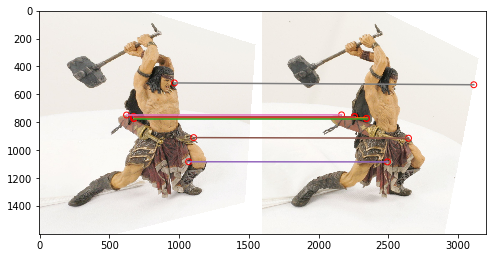

In [26]:
corrs = correspondence_matching_epipole(rectified_im3, rectified_im4, corners2, F_new2, R, NCCth)
display_correspondence(rectified_im3, rectified_im4, corrs ,name="warrior")